In [4]:
## from https://machinelearningknowledge.ai/instance-segmentation-using-mask-rcnn-in-opencv-python/#Instance_Segmentation_on_Image_using_Mask-RCNN_in_OpenCV_Python

import cv2
import numpy as np
import matplotlib.pyplot as plt




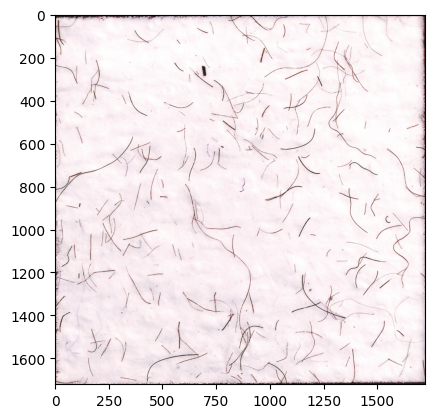

In [9]:
path_to_frozen_inference_graph = 'frozen_inference_graph_coco.pb'
path_coco_model= 'mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'
 
image_path='..\Data\Prepared\one.tif'
colors = np.random.randint(125, 255, (80, 3))
img = cv2.imread(image_path)
plt.imshow(img)


img=cv2.resize(img,(650,550))
height, width, _ = img.shape

In [8]:
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (0, 0, 0)
blob = cv2.dnn.blobFromImage(img, swapRB=True)
net.setInput(blob)
boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]
for i in range(detection_count):
     box = boxes[0, 0, i]
     class_id = box[1]
     score = box[2]
     if score < 0.5:
         continue
     x = int(box[3] * width)
     y = int(box[4] * height)
     x2 = int(box[5] * width)
     y2 = int(box[6] * height)
     roi = black_image[y: y2, x: x2]
     roi_height, roi_width, _ = roi.shape
     mask = masks[i, int(class_id)]
     mask = cv2.resize(mask, (roi_width, roi_height))
     _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)
     cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)
     contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
     color = colors[int(class_id)]
     for cnt in contours:
         cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))
cv2.imshow("Final",np.hstack([img,black_image]))
cv2.imshow("Overlay_image",((0.6*black_image)+(0.4*img)).astype("uint8"))
cv2.waitKey(0)

NameError: name 'height' is not defined

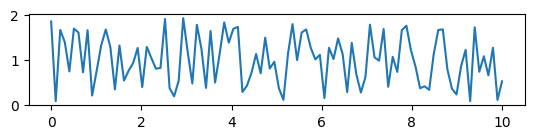

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random points along the x-axis
x = np.linspace(0, 10, 100)

# Generate random y-coordinates for the line
y = np.random.uniform(low=0, high=2, size=len(x))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the random line
ax.plot(x, y)

# Set the aspect ratio to equal
ax.set_aspect('equal')

# Show the plot
plt.show()


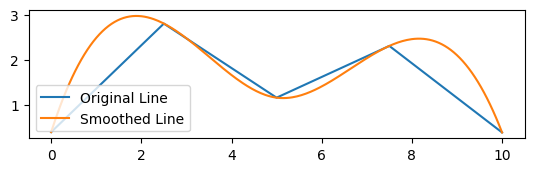

In [15]:

# Generate random curved lines - 

import numpy as np
from scipy.interpolate import make_interp_spline

# Generate random points along the x-axis
x = np.linspace(0, 10, 5)

# Generate random y-coordinates for the line
y = np.random.uniform(low=0, high=3, size=len(x))

# Create a spline function
spline = make_interp_spline(x, y)

# Generate a new set of x values for smoother interpolation
x_new = np.linspace(x.min(), x.max(), 300)

# Interpolate the y values using the spline function
y_smooth = spline(x_new)

# Plot the original line
plt.plot(x, y, label='Original Line')

# Plot the smoothed line
plt.plot(x_new, y_smooth, label='Smoothed Line')

# Set the aspect ratio to equal
plt.gca().set_aspect('equal')

# Add legend
plt.legend()

# Show the plot
plt.show()
